In [52]:
! pip install xgboost
! pip install pandas
! pip install seaborn
! pip install xgboost
! pip install sklearn
! pip install catboost
! pip install umap-learn
! pip install eli5

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the

In [60]:
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns
import xgboost as xgb
import math
import time
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from catboost import CatBoostRegressor
import eli5
from eli5.sklearn import PermutationImportance

In [48]:
df = pd.read_csv('V5_final_dataset.csv', index_col=0)

In [49]:
# df = df[['Osmolarity (vein)', 'Glu (vein)', 'Na + (vein)', 'ctO2 (vein)', 'pH (vein)', 'Lac (vein)']]
df = df.drop_duplicates()
research_feature = 'Glu (vein)'
X = df.drop(columns=[research_feature])
print(df.shape)
y = df[research_feature]
# print(y.value_counts())
# print(df['Osmolarity (vein)'].value_counts())
# print(df['Na + (vein)'].value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_s = preprocessing.normalize(X_train)
X_test_s = preprocessing.normalize(X_test)


(15257, 28)


In [50]:
def regressionAlgorithm(regressor):
    kfold = KFold(n_splits=10, shuffle=True)
    mse_array = []
    mae_array = []
    r2_array = []

    x_np = np.array(X)
    y_np = np.array(y)
    
    for train_index, test_index in kfold.split(x_np, y_np):
        x_train, x_test = x_np[train_index], x_np[test_index]
        y_train, y_test = y_np[train_index], y_np[test_index]
        x_train_s = preprocessing.normalize(x_train)
        x_test_s = preprocessing.normalize(x_test)
        regressor.fit(x_train_s, y_train)
        y_pred = regressor.predict(x_test_s)
        plt.figure(figsize=(15,5)) 
        plt.plot(y_test.tolist(), label='Y test')
        plt.plot(y_pred, label='XGBoost')
        mse_array.append(sklearn.metrics.mean_squared_error(y_test, y_pred))
        mae_array.append(sklearn.metrics.mean_absolute_error(y_test, y_pred))
        r2 = sklearn.metrics.r2_score(y_test, y_pred)
        print(r2)
        r2_array.append(r2)

    print('mse:', np.mean(mse_array))
    print('mae:', np.mean(mae_array))
    print('r^2:', np.mean(r2_array))
    

In [ ]:
regressionAlgorithm(xgb.XGBRegressor(random_state=42))

In [56]:
def permutationImportance(regressor, x, y, columns, df):
    regressor.fit(x, y)
    perm = PermutationImportance(regressor, random_state=42).fit(x, y)
    exp = eli5.explain_weights(perm, feature_names=columns.tolist(), top=None)
    weights_dataframe = eli5.formatters.as_dataframe.format_as_dataframe(exp)
    weights_dataframe.to_csv('PermutationImportance' + str(math.ceil(time.time() % 100000)) + '.csv')
    print('Completed')

In [61]:
permutationImportance(xgb.XGBRegressor(random_state=42), np.array(X), np.array(y), X.columns, df)

Completed


In [62]:
regressor = CatBoostRegressor(silent=True, random_state=42, n_estimators=1000)
permutationImportance(regressor, np.array(X), np.array(y), X.columns, df)

Completed


In [29]:
# xgboost_model = xgb.XGBRegressor(random_state=42, max_depth=3, n_estimators=1000)
xgboost_model = xgb.XGBRegressor(random_state=42)
xgboost_model.fit(X_train_s, y_train)
xgboost_y = xgboost_model.predict(X_test_s)

mse: 7.243434418279964e+30
mae: 479420259092789.06
r^2: -0.4095863941114293


[(0.45520985, 'Glu (vein)'),
 (0.3885319, 'ctO2 (vein)'),
 (0.09297354, 'Lac (vein)'),
 (0.06328474, 'pH (vein)')]

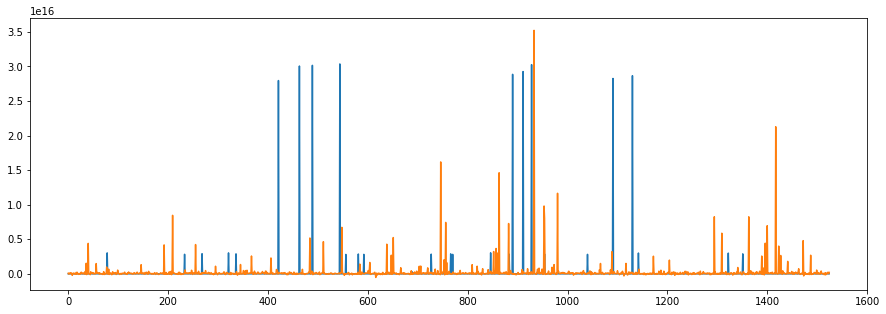

In [30]:
plt.figure(figsize=(15,5)) 
plt.plot(y_test.tolist(), label='Y test')
plt.plot(xgboost_y, label='XGBoost')
print('mse:', sklearn.metrics.mean_squared_error(y_test, xgboost_y))
print('mae:', sklearn.metrics.mean_absolute_error(y_test, xgboost_y))
print('r^2:', sklearn.metrics.r2_score(y_test, xgboost_y))
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
imp = xgboost_model.feature_importances_
feat = {}
for i in range(len(X_train.columns)):
    feat[X_train.columns[i]] = imp[i]
    
sorted( ((k,v) for v,k in feat.items()), reverse=True) 

In [26]:
model = CatBoostRegressor(silent=True, random_state=42, n_estimators=1000)
# model = CatBoostRegressor(silent=True, random_state=42)
model.fit(X_train_s, y_train)
catboost_y = model.predict(X_test_s)

mse: 2.643151028265868e+29
mae: 48817188452704.46
r^2: 0.9485637680708108


[(27.864150386465163, 'Lac (vein)'),
 (27.34441184912, 'pH (vein)'),
 (24.32271382922019, 'ctO2 (vein)'),
 (19.807036369744534, 'Glu (vein)'),
 (0.6616875654501186, 'Na + (vein)')]

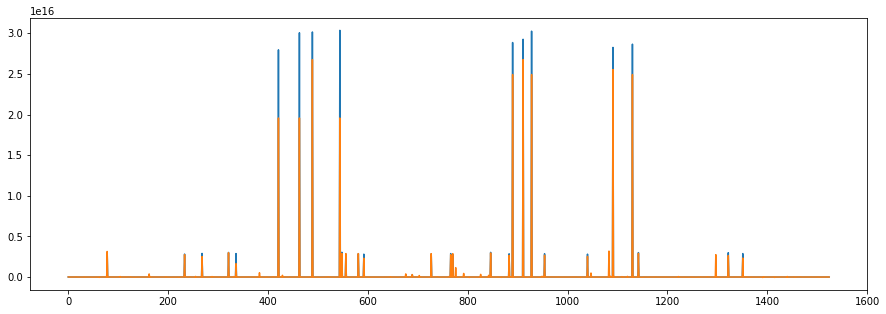

In [27]:
plt.figure(figsize=(15,5))
plt.plot(y_test.tolist(), label='Y test')
plt.plot(catboost_y, label='CatBoost')
print('mse:', sklearn.metrics.mean_squared_error(y_test, catboost_y))
print('mae:', sklearn.metrics.mean_absolute_error(y_test, catboost_y))
print('r^2:', sklearn.metrics.r2_score(y_test, catboost_y))
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
imp = model.get_feature_importance()
feat = {}
for i in range(len(X_train.columns)):
    feat[X_train.columns[i]] = imp[i]
    
sorted( ((k,v) for v,k in feat.items()), reverse=True) 

In [71]:
from sklearn.model_selection import GridSearchCV, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
params_grid = {
    'n_estimators': [60, 100, 180, 300, 500, 1000]
}

model = CatBoostRegressor(silent=True, random_state=42)
grid_model = GridSearchCV(model, params_grid, cv=cv, scoring='neg_mean_squared_error')
grid_model.fit(X_train, y_train)
y_pred = grid_model.predict(X_test)

mse: 0.8374064716346705
mae: 0.624301923601688
r^2: 0.9450260731237791


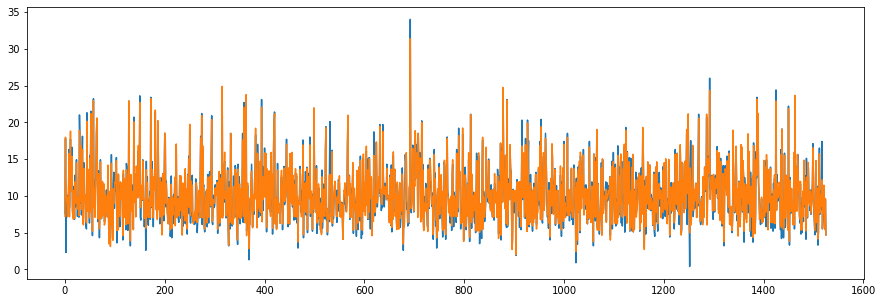

In [72]:
plt.figure(figsize=(15,5)) 
plt.plot(y_test.tolist(), label='Y test')
plt.plot(y_pred, label='XGBoost')
print('mse:', sklearn.metrics.mean_squared_error(y_test, y_pred))
print('mae:', sklearn.metrics.mean_absolute_error(y_test,y_pred))
print('r^2:', sklearn.metrics.r2_score(y_test, y_pred))
imp = model.get_feature_importance()
for i in range(len(df.columns)):
    print(df.columns[i], imp[i])

In [73]:
grid_model.best_params_

{'n_estimators': 1000}

In [60]:
from sklearn.model_selection import GridSearchCV, KFold

model = xgb.XGBRegressor(random_state=42, nthread=-1, n_estimators=1000)
model.fit(X_train, y_train)
y_pred = grid_model.predict(X_test)

array([0.00225673, 0.00198019, 0.00125848, 0.00213049, 0.00291465,
       0.00681616, 0.00159439, 0.00355769, 0.00512588, 0.00497744,
       0.00311055, 0.00425973, 0.00450933, 0.00472835, 0.00654494,
       0.00423775, 0.00625661, 0.00532759, 0.00502311, 0.43077028,
       0.00360683, 0.00845669, 0.05446847, 0.38585818, 0.03209466,
       0.00289047, 0.00524436], dtype=float32)

In [65]:
df.columns[23]

'Lac (vein)'

In [70]:
df.corr()

,Sex,Smoke_status,SBE (vein),"HCO3- (P, st) (vein)",FCOHb (vein),FHHb (vein),FMetHb (vein),FHbF (vein),F02Hb (vein),ctBil (vein),...,K + (vein),Na + (vein),Ca2 + ( vein),Cl- (vein),Glu (vein),Lac (vein),Osmolarity (vein),ctO2 (vein),p50 (vein),Age
Sex,1.000000,0.391671,-0.027804,0.001722,-0.014384,0.030907,-0.018250,-0.085212,-0.017188,-0.052450,...,0.017445,-0.030706,-0.030979,-0.029686,-0.061251,-0.030159,-0.026996,0.064287,-0.033811,-0.245026
Smoke_status,0.391671,1.000000,0.041181,0.027275,0.023669,0.020617,0.042094,-0.061652,0.015880,-0.014731,...,-0.013524,-0.023658,-0.093517,-0.023713,-0.062361,-0.059931,-0.021646,0.082244,-0.021764,-0.221986
SBE (vein),-0.027804,0.041181,1.000000,0.594072,0.453927,0.431169,0.382887,-0.001191,0.472115,0.203458,...,0.021874,-0.014721,-0.017654,-0.014904,-0.036016,-0.021610,-0.013492,0.029620,-0.386850,-0.027904
"HCO3- (P, st) (vein)",0.001722,0.027275,0.594072,1.000000,0.903432,0.891238,0.814680,0.144951,0.962211,0.445920,...,0.087729,-0.027342,-0.063122,-0.027517,-0.013749,0.018693,-0.024760,0.002667,-0.722342,0.056719
FCOHb (vein),-0.014384,0.023669,0.453927,0.903432,1.000000,0.790736,0.730711,0.076264,0.899351,0.460687,...,0.084281,-0.022355,-0.059735,-0.022312,-0.016637,0.004910,-0.019916,0.007560,-0.631243,0.085501
FHHb (vein),0.030907,0.020617,0.431169,0.891238,0.790736,1.000000,0.725318,0.086210,0.781451,0.446373,...,0.073612,-0.025375,-0.060881,-0.025562,-0.018886,0.036274,-0.023020,-0.095064,-0.666913,0.055208
FMetHb (vein),-0.018250,0.042094,0.382887,0.814680,0.730711,0.725318,1.000000,0.151991,0.813529,0.488980,...,0.088127,-0.027163,-0.095398,-0.027330,0.004840,0.047224,-0.024580,0.017469,-0.575690,0.066462
FHbF (vein),-0.085212,-0.061652,-0.001191,0.144951,0.076264,0.086210,0.151991,1.000000,0.194895,0.070358,...,0.047559,-0.002609,0.033504,-0.002548,0.020988,-0.011226,-0.002119,-0.085294,0.035489,0.052233
F02Hb (vein),-0.017188,0.015880,0.472115,0.962211,0.899351,0.781451,0.813529,0.194895,1.000000,0.430426,...,0.097638,-0.026019,-0.059039,-0.026121,0.000887,0.034601,-0.023456,0.040538,-0.691013,0.075397
ctBil (vein),-0.052450,-0.014731,0.203458,0.445920,0.460687,0.446373,0.488980,0.070358,0.430426,1.000000,...,0.063143,-0.015989,0.006581,-0.016135,-0.032424,0.143611,-0.014540,-0.010664,-0.335634,0.083910


In [98]:
correlation_matrix = df.corr()
correlated_features = []
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)

In [99]:
np.unique(correlated_features)

array(['Cl- (vein)', 'F02Hb (vein)', 'FCOHb (vein)', 'FHHb (vein)',
       'FMetHb (vein)', 'HCO3- (P) (vein)', 'Na + (vein)',
       'Osmolarity (vein)', 'ctHb (vein)', 'pCO2 (vein)'], dtype='<U17')

In [105]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)

[[-2.88119838e-18 -3.25294196e-16  4.82657814e-18 -5.00170300e-17
  -1.56239902e-18 -6.97066024e-17 -2.28228303e-18 -5.10648563e-19
  -1.31423327e-16 -4.92351162e-17  1.02908243e-19  1.06031289e-01
   1.23842156e-01  7.04605593e-18  7.31692073e-02  1.18463294e-01
   2.82021318e-01 -9.74028772e-20 -3.81979786e-19  3.93396809e-01
   3.55880020e-19  2.90629006e-01  7.62399454e-19  7.97038838e-01
  -2.15629418e-18  4.85475081e-17 -2.93238002e-17]
 [ 2.54134841e-17  2.86343514e-16  3.65539839e-16  2.43542038e-16
   2.27651398e-17  4.29547472e-16  1.40707614e-17  3.47598075e-18
   7.96915587e-16  3.01410249e-16 -5.65089417e-19 -8.28064068e-02
  -1.13461356e-01 -2.37234140e-17 -6.45723956e-02 -4.85100448e-01
  -3.86917803e-01  9.82100038e-20 -4.03748704e-18 -4.26281761e-01
  -1.23197775e-18 -3.01944126e-01  1.88097795e-18  5.64079603e-01
  -9.91373139e-17 -5.54052607e-16  1.89794701e-16]
 [ 1.28276922e-17 -1.67685850e-16  2.59959573e-16  7.49965422e-17
   2.63470607e-17  4.55759998e-17  1.022

In [12]:
import umap
reducer = umap.UMAP(n_components=27)

rofl = reducer.fit_transform(X)


In [14]:
rofl[0]

array([8.354322 , 4.6913195, 5.237167 , 2.8748038, 4.354326 , 4.946024 ,
       0.9924425, 4.6134877, 4.7851534, 5.0513077, 4.6745367, 5.1380906,
       5.011867 , 5.1826344, 5.3045416, 4.914797 , 4.6037893, 4.9386888,
       4.3845983, 5.8769903, 5.281798 , 5.5440426, 4.838081 , 4.6636434,
       4.234932 , 5.1081333, 5.223303 ], dtype=float32)